# Goal: To build a reliable model that predicts whether a video is a claim or opinion

In [1]:
import os
os.path.abspath("TikTok_Classification_draft1.ipynb")

'C:\\Users\\archi\\Documents\\MSBAIM\\Spring\\IP\\Coursera\\CourseraLabs\\TikTok_Classification_draft1.ipynb'

In [2]:
#pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("tiktok_dataset.csv")
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## Exploratory Data Analysis

In [5]:
data.size #232584 = 19382*12
data.shape # data.shape

(19382, 12)

In [6]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [81]:
#data['video_duration_sec'].value_counts
data['video_duration_sec'].nunique() #unique values of video_duration_sec

19382

In [9]:
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
data['claim_status'].value_counts()
#does the same thing as
#data[['claim_status']].groupby('claim_status').apply(lambda x: x.notnull().sum())

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [11]:
#data.isnull().groupby('claim_status').sum()
data[['claim_status']].groupby('claim_status').apply(lambda x: x.isnull().sum())

,claim_status
claim_status,
claim,0
opinion,0


In [12]:
data.groupby('author_ban_status')['claim_status'].apply(lambda x: x.isnull().sum())
#no of claim_status nulls in each of the author ban category

author_ban_status
active          280
banned            4
under review     14
Name: claim_status, dtype: int64

## Visualisations

<function matplotlib.pyplot.show(close=None, block=None)>

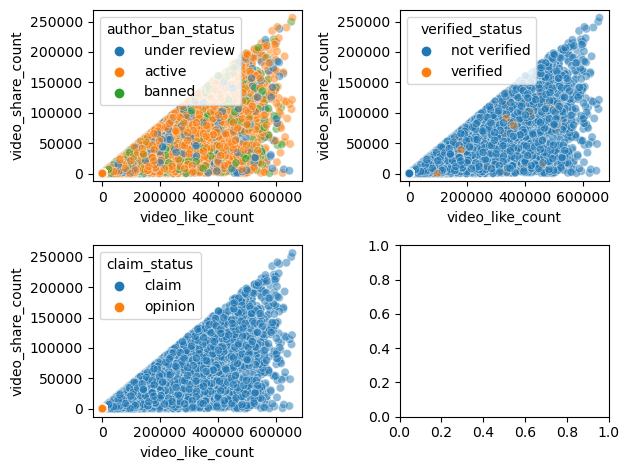

In [96]:
#plt.scatter(data[['video_duration_sec']],data[['video_like_count']], c='pink',alpha=0.5)
fig,axes=plt.subplots(2,2)
sns.scatterplot(x=data['video_like_count'],y=data['video_share_count'], hue=data['author_ban_status'], ax=axes[0,0],alpha=0.5)
sns.scatterplot(x=data['video_like_count'],y=data['video_share_count'], hue=data['verified_status'], ax=axes[0,1],alpha=0.5)
sns.scatterplot(x=data['video_like_count'],y=data['video_share_count'], hue=data['claim_status'], ax=axes[1,0],alpha=0.5)
#sns.scatterplot(x=data['verified_status'],y=data['video_view_count'],  ax=axes[1,1],alpha=0.5)
plt.tight_layout()
plt.show

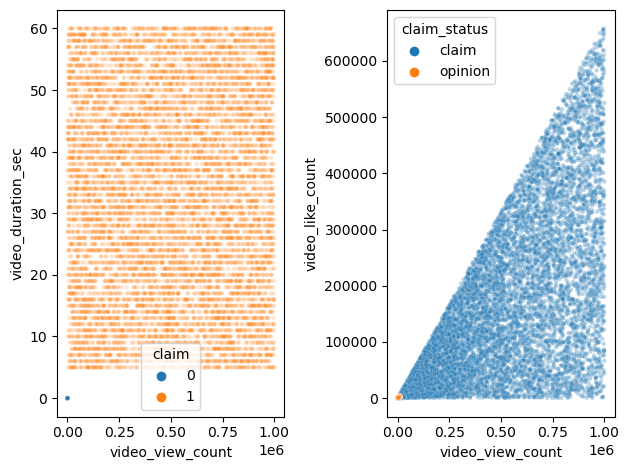

In [63]:
data1=data
#data1.loc[data1['claim_status'] == 'claim', 'claims'] = 1
data1=data1.assign(claim=1).where(data1.claim_status=='claim',0)
data1.head()
fig,axes=plt.subplots(1,2)
sns.scatterplot(x=data1['video_view_count'],y=data1['video_duration_sec'],hue=data1['claim'],ax=axes[0],s=10,alpha=0.2)
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],hue=data["claim_status"], ax=axes[1],s=10, alpha=.3)
plt.tight_layout()
plt.show()

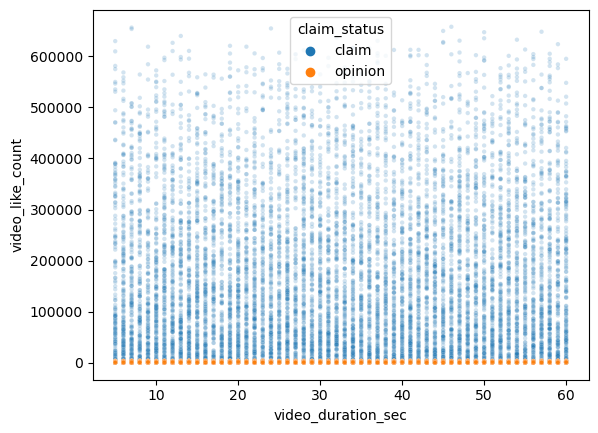

In [79]:
sns.scatterplot(x=data['video_duration_sec'],y=data['video_like_count'],hue=data['claim_status'],s=10,alpha=0.2)
plt.show()

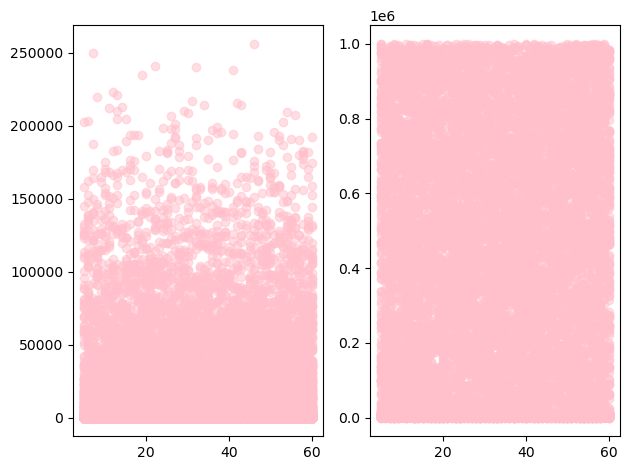

In [30]:
fig, axes = plt.subplots(1, 2)

axes[0].scatter(data['video_duration_sec'], data['video_share_count'], c='pink', alpha=0.5)
axes[1].scatter(data['video_duration_sec'], data['video_view_count'], c='pink', alpha=0.5)
#axes[2].scatter(data['author_ban_status'], data['claim_status'], c='pink', alpha=0.5)

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

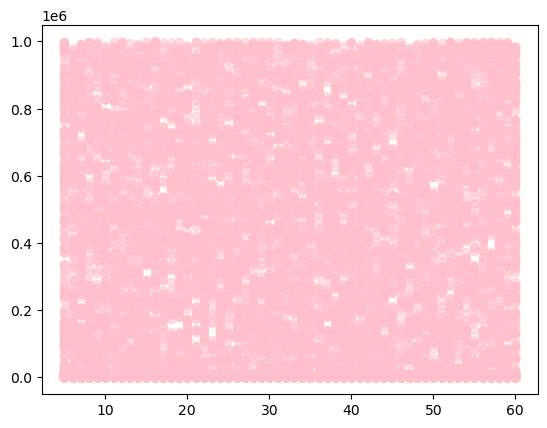

In [14]:
plt.scatter(data[['video_duration_sec']],data[['video_view_count']], c='pink',alpha=0.5)
plt.show

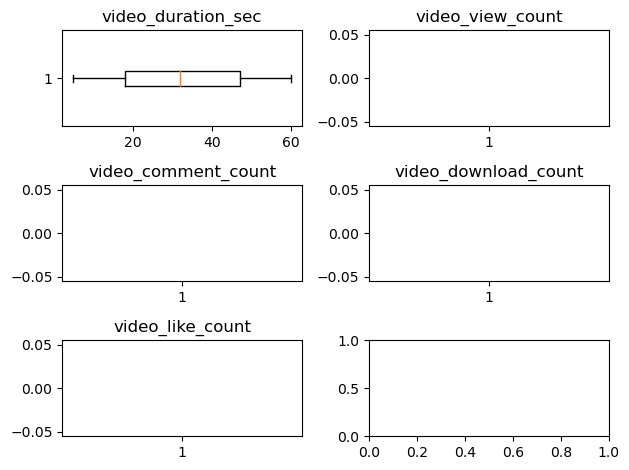

In [15]:
fig, axes = plt.subplots(3, 2)
# Plot the boxplot for 'video_duration_sec' on the first axis
axes[0,0].boxplot(data['video_duration_sec'], notch=None, vert=False)
axes[0,0].set_title("video_duration_sec")

# Plot the boxplot for 'video_view_count' on the second axis
axes[0,1].boxplot(data['video_view_count'], notch=None, vert=True)
axes[0,1].set_title("video_view_count")

# Plot the boxplot for 'video_comment_count' on the second axis
axes[1,0].boxplot(data['video_comment_count'], notch=None, vert=True)
axes[1,0].set_title("video_comment_count")

# Plot the boxplot for 'video_download_count' on the second axis
axes[1,1].boxplot(data['video_download_count'], notch=None, vert=True)
axes[1,1].set_title("video_download_count")

# Plot the boxplot for 'video_like_count' on the second axis
axes[2,0].boxplot(data['video_like_count'], notch=None, vert=True)
axes[2,0].set_title("video_like_count")

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Display the plot
plt.show()

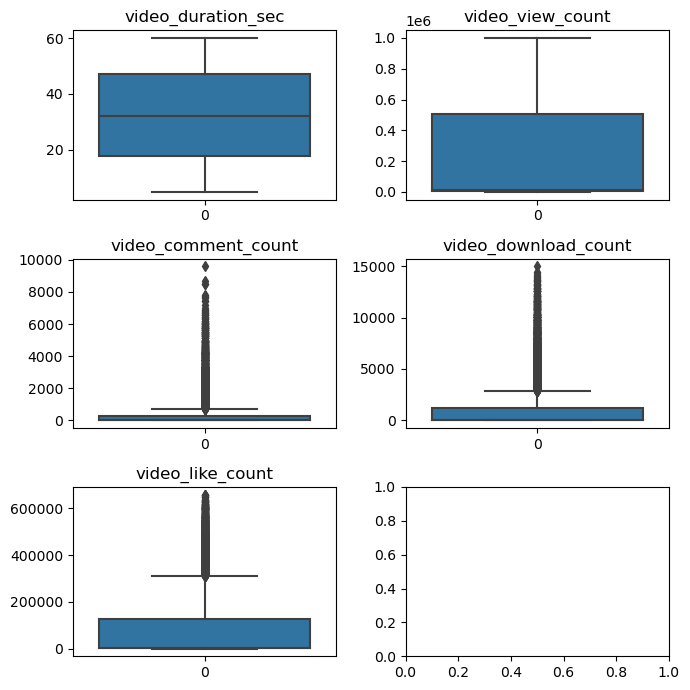

In [16]:
#same code as above but in sns = built on top of plt; more user friendly & advanced
# Create subplots using Seaborn
fig, axes = plt.subplots(3, 2, figsize=(7, 7))

# Plot boxplots using Seaborn
sns.boxplot(data=data['video_duration_sec'], ax=axes[0, 0])
sns.boxplot(data=data['video_view_count'], ax=axes[0, 1])
sns.boxplot(data=data['video_comment_count'], ax=axes[1, 0])
sns.boxplot(data=data['video_download_count'], ax=axes[1, 1])
sns.boxplot(data=data['video_like_count'], ax=axes[2, 0])

# Set titles for each subplot
axes[0, 0].set_title("video_duration_sec")
axes[0, 1].set_title("video_view_count")
axes[1, 0].set_title("video_comment_count")
axes[1, 1].set_title("video_download_count")
axes[2, 0].set_title("video_like_count")

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Display the plot
plt.show()

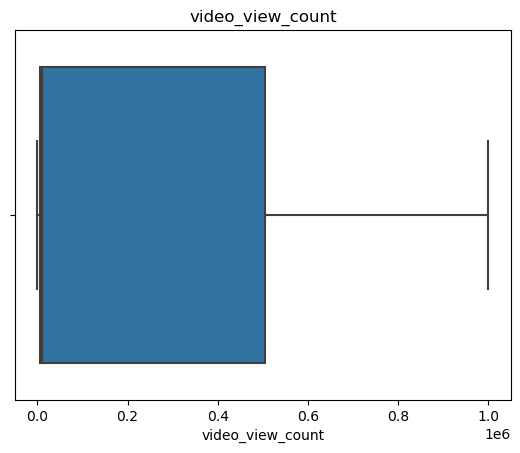

In [17]:
# Create a boxplot to visualize distribution of `video_view_count`
#plt.figure(figsize=(5, 1))
plt.title('video_view_count')
sns.boxplot(x=data['video_view_count']);

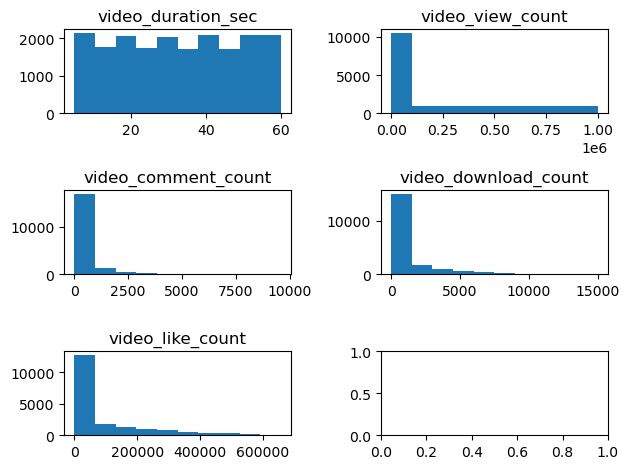

In [18]:
fig, axes = plt.subplots(3, 2)
axes[0,0].hist(data['video_duration_sec'])
axes[0,0].set_title("video_duration_sec")

axes[0,1].hist(data['video_view_count'])
axes[0,1].set_title("video_view_count")

axes[1,0].hist(data['video_comment_count'])
axes[1,0].set_title("video_comment_count")

axes[1,1].hist(data['video_download_count'])
axes[1,1].set_title("video_download_count")

axes[2,0].hist(data['video_like_count'])
axes[2,0].set_title("video_like_count")

# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()

#### the boxplots are mostly empty since data distribution is highly skewed or concentrated in a small range, hence the boxplot might not provide useful information. Confirmed it by using histogram.

In [29]:
data['verified_status'].unique()

array(['not verified', 'verified'], dtype=object)

Text(0.5, 1.0, 'Claims by verification status histogram')

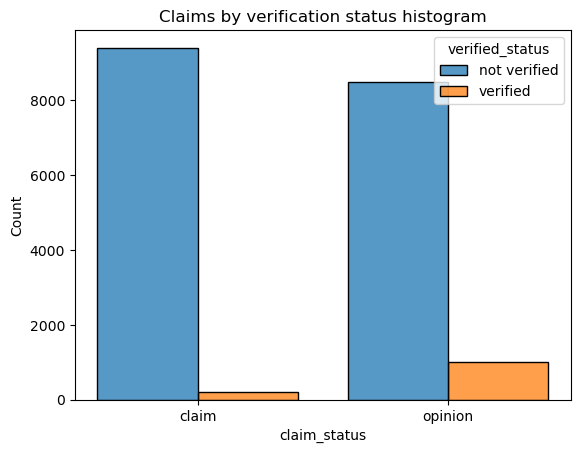

In [20]:
#### **Claim status by verification status**
#histogram with four bars: one for each combination of claim status and verification status.
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.8)
plt.title('Claims by verification status histogram')

In [ ]:
sns.histplot(data,x=

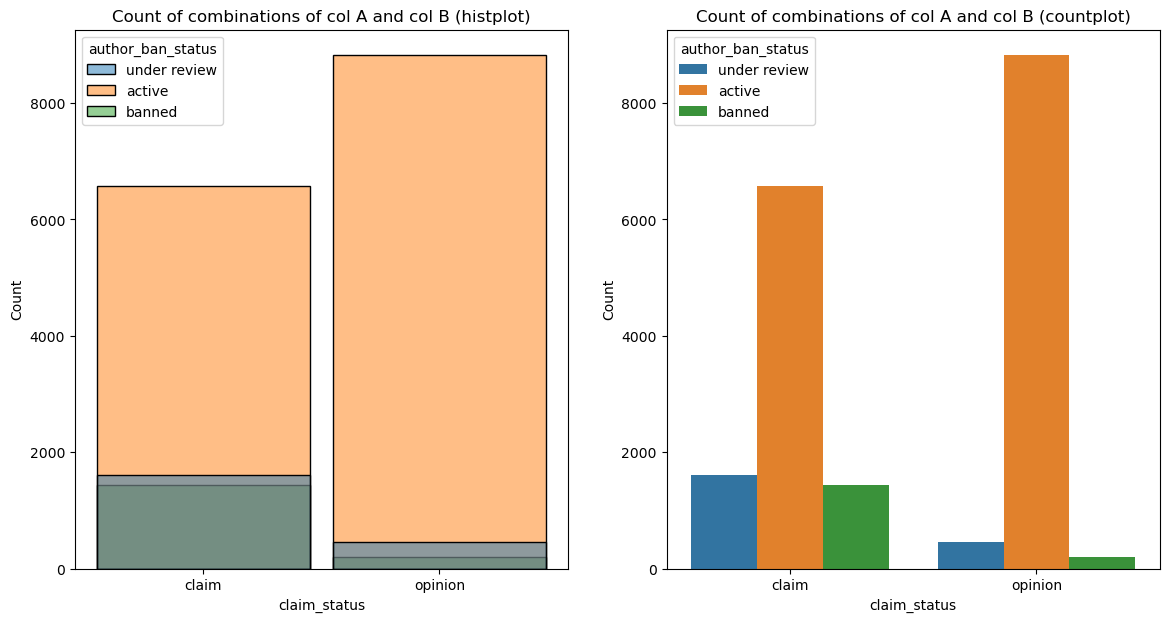

In [21]:
##Claim status by verification status
# Create subplots using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.histplot(data=data, x='claim_status', hue='author_ban_status', shrink=0.9, ax=axes[0])
#palette={'active':'green', 'under review':'orange', 'banned':'red'},alpha=0.5
axes[0].set_title('Count of combinations of col A and col B (histplot)')
axes[0].set_xlabel('claim_status')
axes[0].set_ylabel('Count')

sns.countplot(data=data, x='claim_status', hue='author_ban_status', ax=axes[1])
axes[1].set_title('Count of combinations of col A and col B (countplot)')
axes[1].set_xlabel('claim_status')
axes[1].set_ylabel('Count')

plt.show()

In [22]:
df=data.groupby(['author_ban_status']).median(numeric_only=True)
df.iloc[:, 0]

author_ban_status
active          10966.0
banned           5304.0
under review     6175.5
Name: #, dtype: float64

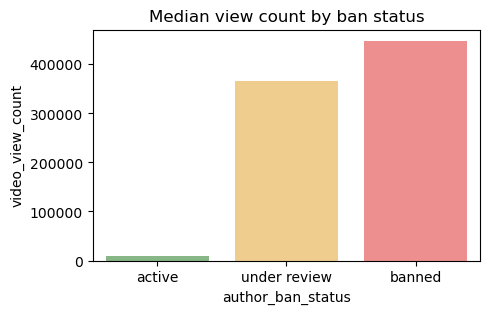

In [23]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

In [87]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    ct=data[column].count()
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count, 'out of {} '.format(ct), 'or, ~ {}% of total values'.format(round(outlier_count*100/ct)))

Number of outliers, video_view_count: 2343 out of 19084  or, ~ 12% of total values
Number of outliers, video_like_count: 3468 out of 19084  or, ~ 18% of total values
Number of outliers, video_share_count: 3732 out of 19084  or, ~ 20% of total values
Number of outliers, video_download_count: 3733 out of 19084  or, ~ 20% of total values
Number of outliers, video_comment_count: 3882 out of 19084  or, ~ 20% of total values


## Hypothesis

In [99]:
data.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

In [105]:
#Intial Hypothesis- H0: Account being verified has no impact on view_count
#HA: Verification status plays a role in determining the views

# Conduct a two-sample t-test to compare means (since we're comparing 2 means)
from scipy import stats

# Save each sample in a variable
not_verified = data[data["verified_status"] == "not verified"]["video_view_count"].dropna()
verified = data[data["verified_status"] == "verified"]["video_view_count"].dropna()

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

In [106]:
print(not_verified.count(),verified.count())

17884 1200
